# ch03.04. 기초통계 - 대표통계량
---
* 날짜:2022-05-09
* 이름:안창덕

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.randint(1, 100, 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

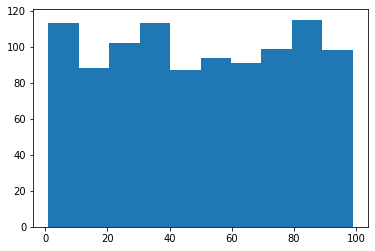

In [ ]:
plt.hist(s)
plt.show()

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [ ]:
np.median(a), s.median()

(49.0, 49.0)

### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [ ]:
np.mean(a), s.mean()

(49.723, 49.723)

### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [ ]:
def harmonic(x):
  return s.count()/np.sum(1/x)

* 조화 평균 계산

In [ ]:
harmonic(a)

16.869083648783032

### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [ ]:
from scipy.stats import trim_mean
trim_mean(s, 0.1) 

49.81125

## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [ ]:
np.random.choice(list, shape)

In [3]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.choice(['A','B','C'], 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

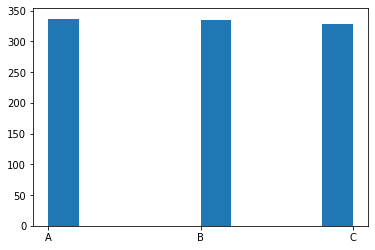

In [ ]:
plt.hist(s)
plt.show()

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [ ]:
s.value_counts()

A    337
B    335
C    328
dtype: int64

* 사이파이 함수 `mode` 사용하기

In [ ]:
from scipy.stats import mode
mode(a)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([337]))

## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

In [ ]:
a = np.random.normal(2000000, 50, 100)

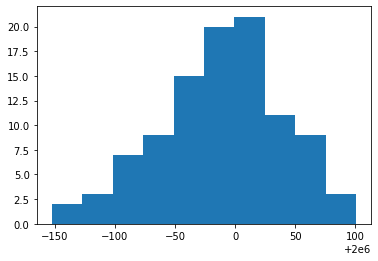

In [ ]:
plt.hist(a)
plt.show()

In [ ]:
b = np.insert(a, 0, 1000000000)

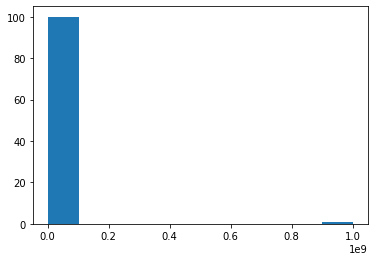

In [ ]:
plt.hist(b)
plt.show()

In [ ]:
print('10억원 추가 전 산술평균:',np.mean(a),'\n','10억원 추가 후 산술평균:',np.mean(b))

10억원 추가 전 산술평균: 1999988.5094082758 
 10억원 추가 후 산술평균: 11881176.741988393


In [ ]:
print('10억원 추가 전 절사평균:',trim_mean(a, 0.1),'\n','10억원 추가 후 절사평균:', trim_mean(b, 0.1))

10억원 추가 전 절사평균: 1999990.382736259 
 10억원 추가 후 절사평균: 1999991.2008999344


#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


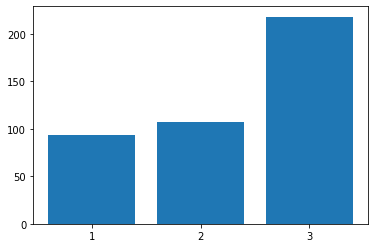

In [ ]:
x = test['Pclass'].unique()
y = test['Pclass'].value_counts() #티켓등급

plt.bar(x, y)
plt.xticks(x)
plt.show()

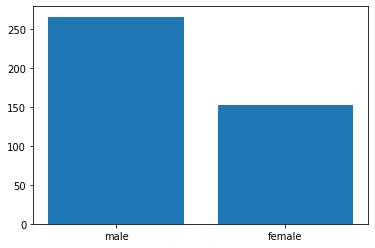

In [ ]:
x= test['Sex'].unique()
y= test['Sex'].value_counts()   #성별

plt.bar(x, y)
plt.xticks(x)
plt.show()

In [ ]:
test.iloc[:,4:5].mean()  #나이

Age    30.27259
dtype: float64

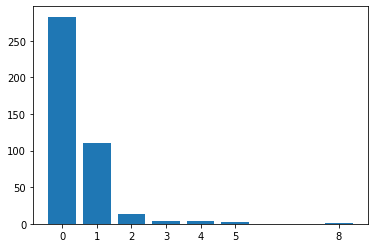

In [ ]:
x = test['SibSp'].unique()
y = test['SibSp'].value_counts() #타이타닉에 승선한 형제자매 또는 배우자의 수

plt.bar(x, y)
plt.xticks(x)
plt.show()

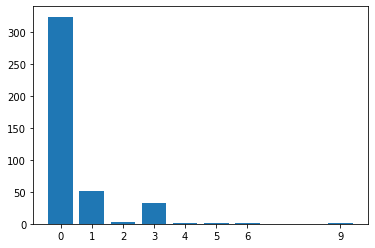

In [ ]:
x= test['Parch'].unique()
y= test['Parch'].value_counts()   #타이타닉에 승선한 부모 - 자식의 수

plt.bar(x, y)
plt.xticks(x)
plt.show()

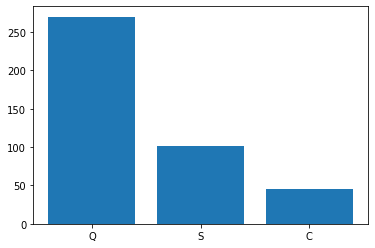

In [ ]:
x= test['Embarked'].unique()
y= test['Embarked'].value_counts() #승선 항구 이름 ( C = Cherbourg, Q = Queenstown, S = Southampton )

plt.bar(x, y)
plt.xticks(x)
plt.show()

In [ ]:
test.iloc[:,8:9].mean() #승선요금

Fare    35.627188
dtype: float64